### Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

1.1. Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Изучите стоимости недвижимости

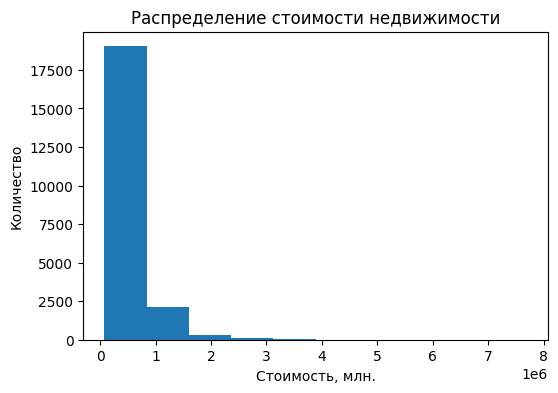

In [61]:
plt.figure(figsize=(6, 4))
plt.hist(df['price'])
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость, млн.')
plt.ylabel('Количество');

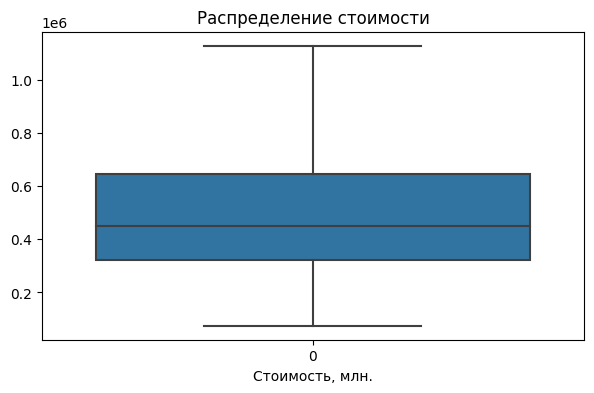

In [62]:
plt.figure(figsize=(7, 4))
sns.boxplot(df['price'], showfliers=False)
plt.title('Распределение стоимости')
plt.xlabel('Стоимость, млн.');

Стоимость основного количества объектов недвижимости распределена в диапазоне от 0,3 до 0,65 млн.

1.3 Изучите распределение квадратуры жилой

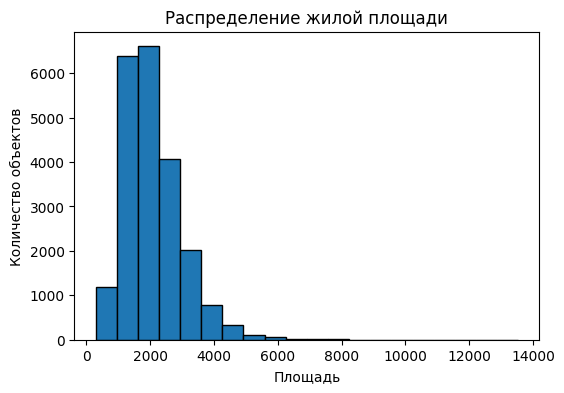

In [63]:
plt.figure(figsize=(6, 4))
plt.hist(df['sqft_living'], bins=20, edgecolor = 'black')
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество объектов');

Наибольшее количество объектов с площадью около 2000

1.4 Изучите распределение года постройки

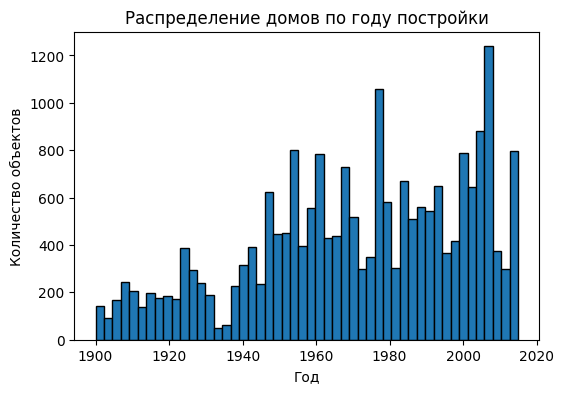

In [64]:
plt.figure(figsize=(6, 4))
plt.hist(df['yr_built'], bins=50, edgecolor = 'black')
plt.title('Распределение домов по году постройки')
plt.xlabel('Год')
plt.ylabel('Количество объектов');

Больше всего было построено объектов в конце 1970х годов и в середине 00-х

### 2 задача
2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов

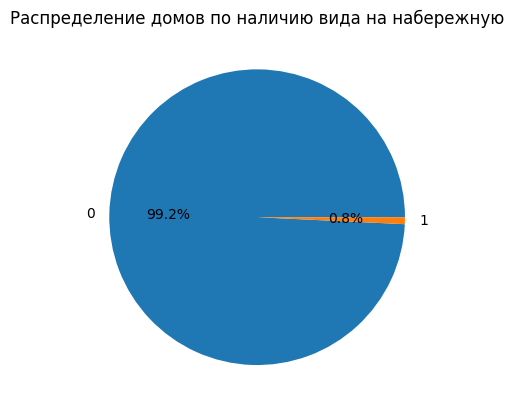

In [65]:
data = df['waterfront'].value_counts()
names = data.index
values = data.values

plt.pie(values, autopct = '%.1f%%', labels=names)
plt.title('Распределение домов по наличию вида на набережную');

Подавляющее большинство домов (99,2%) не имеет вида на набережную

2.2 Изучите распределение этажей домов

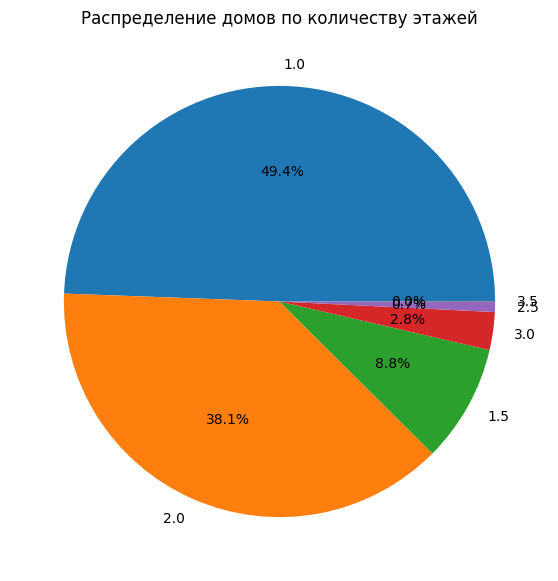

In [66]:
data = df['floors'].value_counts()
names = data.index
values = data.values
plt.figure(figsize=(7, 7))
plt.pie(values, autopct = '%.1f%%', labels=names)
plt.title('Распределение домов по количеству этажей');

Около половины домов одноэтажные, 38,1% двухэтажные. Наименьшую долю занимаю дома 2,5 и 3,5 этажа

2.3 Изучите распределение состояния домов

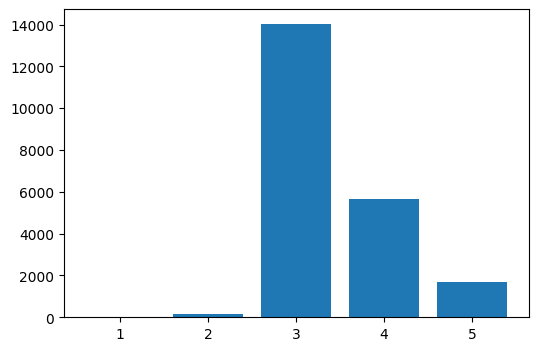

In [67]:
data = df['condition'].value_counts()
names = data.index
values = data.values
plt.figure(figsize=(6, 4))
plt.bar(names, values);

Наибольшее количество домов имеет коэффициент 3 по состоянию

### 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [69]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

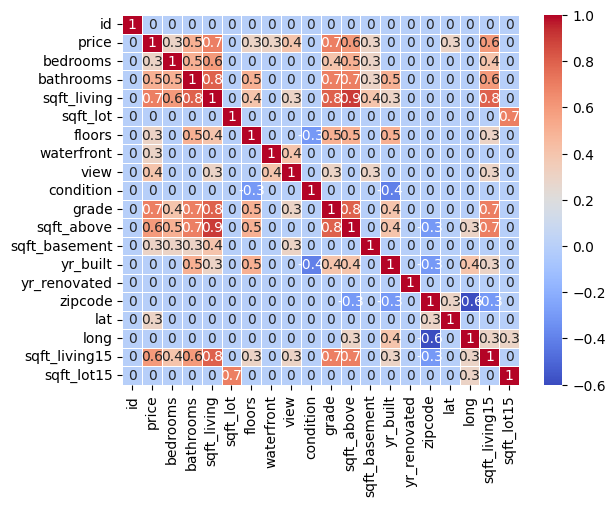

In [70]:
sns.heatmap(corr_matrix, annot = True, linewidths=0.5, cmap='coolwarm')

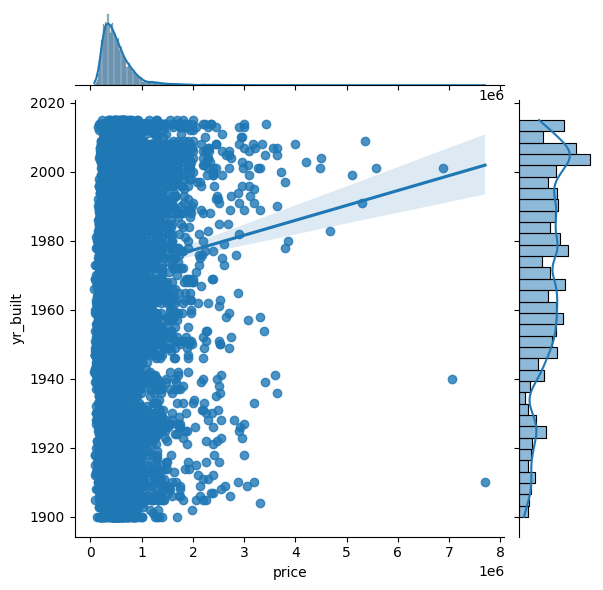

In [71]:
sns.jointplot(x=df['price'], y=df['yr_built'], kind='reg')

Год постройки имеет низкое влияние на цену дома

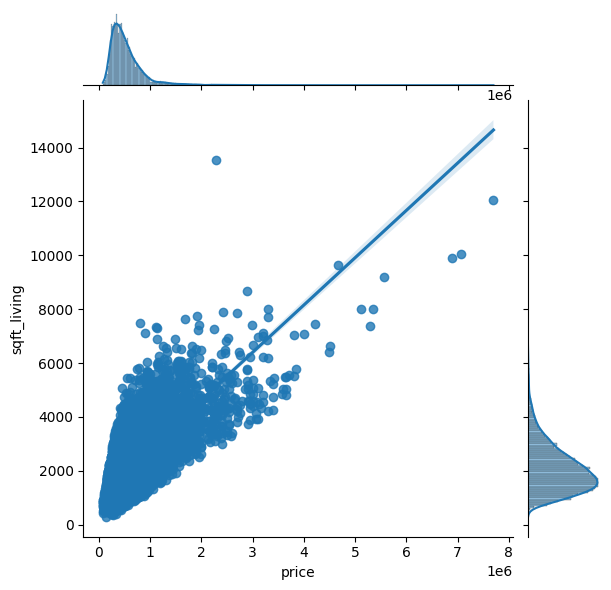

In [72]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg') 

Жилая площадь сильно влияет на стоимость объектов, чем больше жилая площадь, тем дороже дом

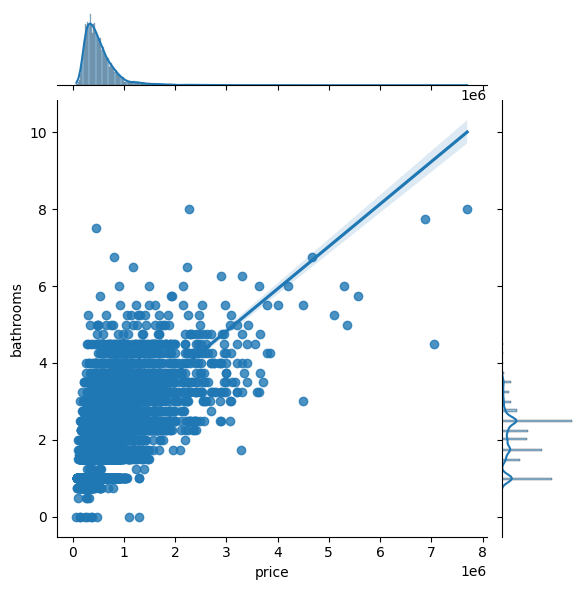

In [75]:

sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg') 

Количество ванных комнат значительно влияет на стоимость. Чем большее ванных, тем дороже дома

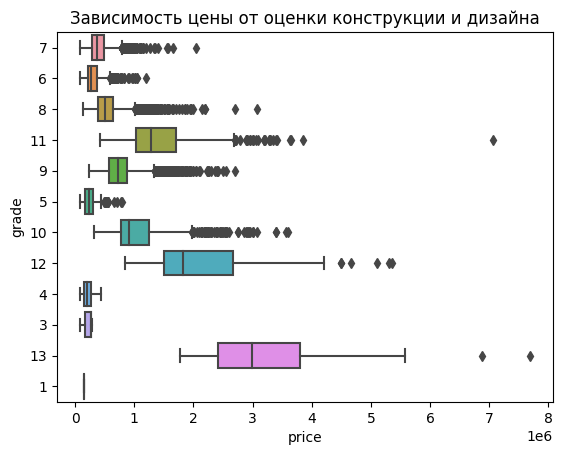

In [76]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('grade')
plt.title('Зависимость цены от оценки конструкции и дизайна');

Наибольшую стоимость имеют дома с коэффициентом оценки и дизайна 13

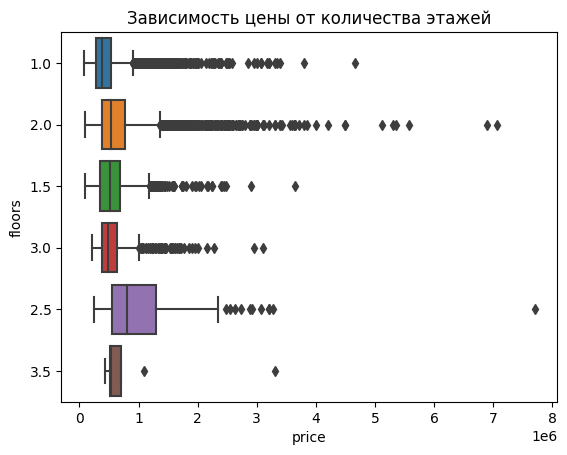

In [77]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('price')
plt.ylabel('floors')
plt.title('Зависимость цены от количества этажей');

Наибольшую стоимость имеют дома с количеством этажей 2,5